In [1]:
#!/usr/bin/env python3
"""
Recreate (data-only) Figure 5-style Tb spectrum for:
- LOFAR 2021-08-07 (Table 1 from arXiv:2205.00065)
- Zirin et al. 1991 (Table 2)
- Subramanian 2004 (range at 34.5 MHz)
- Melnik et al. 2018 (20 & 25 MHz)
- Sharma & Oberoi 2020 (Table 1 disk-averaged Tb_MWA)

Outputs:
- quiet_sun_tb_points.csv
- figure5_datapoints_only.png
"""

from __future__ import annotations

import math
import pandas as pd
import matplotlib.pyplot as plt



In [9]:
#!/usr/bin/env python3
"""
Build Tb spectra datapoints (Figure 5 style, no model) and write to TbSpectra.csv

Columns:
- source
- avg_type
- freq_MHz
- Tb_K
- Tb_err_K
- note

Notes:
- LOFAR Tb values are provided in 10^3 K and converted to K.
- Mercier Tb values are provided in MK and converted to K.
- Subramanian 2004 is a range at 34.5 MHz stored as two rows (low/high).
"""

import pandas as pd
import numpy as np

rows = []

def add_point(source, freq_mhz, tb_k, tb_err_k=None, avg_type="", note=""):
    rows.append({
        "source": source,
        "avg_type": avg_type,
        "freq_MHz": float(freq_mhz),
        "Tb_K": float(tb_k),
        "Tb_err_K": (float(tb_err_k) if tb_err_k is not None else np.nan),
        "note": note
    })

def add_range_as_two_rows(source, freq_mhz, tb_low_k, tb_high_k, avg_type="", note=""):
    rows.append({
        "source": source,
        "avg_type": avg_type,
        "freq_MHz": float(freq_mhz),
        "Tb_K": float(tb_low_k),
        "Tb_err_K": np.nan,
        "note": (note + " (low)").strip()
    })
    rows.append({
        "source": source,
        "avg_type": avg_type,
        "freq_MHz": float(freq_mhz),
        "Tb_K": float(tb_high_k),
        "Tb_err_K": np.nan,
        "note": (note + " (high)").strip()
    })

# -----------------------------
# LOFAR 2021-08-07 (user provided)
# f(MHz)  Tb(10^3 K)  err(10^3 K)
# -----------------------------
lofar_txt = """
21.48 376.9 6.8
23.63 383.2 9.6
24.60 386.9 8.6
25.58 390.4 9.1
26.56 371.9 10.3
27.53 402.3 27.3
28.51 418.6 13.4
29.29 428.9 14.0
30.46 445.0 14.3
31.44 458.2 17.3
33.59 482.1 20.7
34.76 497.8 23.2
35.74 502.8 31.0
36.91 520.1 28.8
37.88 531.4 32.5
39.25 539.7 29.0
40.23 545.8 30.9
41.20 563.6 45.3
42.18 571.3 44.9
43.16 586.4 48.2
45.31 601.4 53.3
46.28 611.1 56.1
47.65 612.6 44.0
48.63 626.5 59.6
49.80 629.8 48.1
51.36 637.4 49.3
52.53 646.2 51.5
53.51 654.4 52.7
58.59 669.9 66.4
58.98 671.0 55.2
60.93 695.7 56.5
61.71 764.8 74.6
64.06 755.1 79.0
64.45 767.4 82.3
66.01 760.3 86.6
66.40 783.0 66.0
69.53 767.5 64.9
70.31 733.1 90.7
71.48 730.4 91.7
72.26 746.0 62.8
73.43 726.9 86.9
74.21 746.8 63.1
76.95 748.9 64.6
78.12 746.7 65.1
78.90 749.8 125.1
80.07 737.3 76.2
""".strip()

for line in lofar_txt.splitlines():
    f, tb_kK, err_kK = [float(x) for x in line.split()]
    add_point(
        "LOFAR 2021-08-07",
        f,
        tb_kK * 1e3,
        err_kK * 1e3,
        avg_type="r < 0.5 R_sun",
        note="Tb in 10^3 K"
    )

# -----------------------------
# Zirin et al. 1991 (Table 1) disk-center
# f(GHz) -> MHz, Tb(K), err(K)
# -----------------------------
zirin_freq_ghz = [1.4, 1.6, 1.8, 2.0, 2.4, 2.8, 3.2, 3.6, 4.2, 5.0, 5.8, 7.0, 8.2, 9.4, 10.6, 11.8, 13.2, 14.8, 16.4, 18.0]
zirin_tb_k     = [70.5e3, 63.8e3, 52.2e3, 42.9e3, 32.8e3, 27.1e3, 24.2e3, 21.7e3, 19.4e3, 17.6e3, 15.9e3, 14.1e3, 12.9e3, 12.2e3, 11.3e3, 11.0e3, 10.8e3, 10.8e3, 10.7e3, 10.3e3]
zirin_err_k    = [3.0e3,  2.8e3,  2.5e3,  1.9e3,  1.4e3,  1.1e3,  1.1e3,  1.1e3,  0.8e3,  0.8e3,  0.7e3,  0.6e3,  0.6e3,  0.6e3,  0.5e3,  0.5e3,  0.5e3,  0.6e3,  0.7e3,  0.5e3]

for f_ghz, tb, err in zip(zirin_freq_ghz, zirin_tb_k, zirin_err_k):
    add_point(
        "Zirin et al. 1991",
        f_ghz * 1000.0,
        tb,
        err,
        avg_type="disk-center",
        note="Table 1"
    )

# -----------------------------
# Subramanian et al. 2004 range at 34.5 MHz
# -----------------------------
add_range_as_two_rows(
    "Subramanian et al. 2004",
    34.5,
    1.0e5,
    4.5e5,
    avg_type="disk-avg",
    note="reported range"
)

# -----------------------------
# Ramesh et al. 2006 (2 reported points)
# -----------------------------
add_point("Ramesh et al. 2006", 51.0, 3.85e5, None, avg_type="reported", note="reported point")
add_point("Ramesh et al. 2006", 77.0, 5.44e5, None, avg_type="reported", note="reported point")

# -----------------------------
# Melnik et al. 2018 (2 points)
# -----------------------------
add_point("Melnik et al. 2018", 20.0, 5.1e5, 0.6e5, avg_type="reported", note="reported point")
add_point("Melnik et al. 2018", 25.0, 5.7e5, 0.4e5, avg_type="reported", note="reported point")

# -----------------------------
# Sharma et al. 2020 (MWA band-avg, disk-avg) Tb in MK -> K
# -----------------------------
sharma = [
    (108, 0.51, 0.06),
    (132, 0.62, 0.13),
    (145, 0.63, 0.04),
    (162, 0.66, 0.05),
    (179, 0.65, 0.06),
    (196, 0.75, 0.07),
    (217, 0.86, 0.10),
    (240, 0.75, 0.10),
]
for f_mhz, tb_mk, err_mk in sharma:
    add_point(
        "Sharma et al. 2020",
        f_mhz,
        tb_mk * 1e6,
        err_mk * 1e6,
        avg_type="disk-avg",
        note="MWA band-avg; Tb in MK"
    )

# -----------------------------
# Mercier et al. 2015 (NRH disk-avg) Tb in MK -> K
# -----------------------------
mercier = [
    (149.41535128329934, 0.6174902893864519, 0.08),
    (162.83573841407403, 0.6221879893437455, 0.07),
    (234.83536511724083, 0.6068309844833547, 0.04),
    (325.6956313291197, 0.5639670144184817, 0.03),
    (409.4101910035463, 0.4692961584609440, 0.025),
    (430.83999107015416, 0.44291277733715656, 0.02),
]
for f_mhz, tb_mk, err_mk in mercier:
    add_point(
        "Mercier et al. 2015",
        f_mhz,
        tb_mk * 1e6,
        err_mk * 1e6,
        avg_type="disk-avg",
        note="Tb in MK"
    )

# -----------------------------
# Save
# -----------------------------
df = pd.DataFrame(rows).sort_values(["freq_MHz", "source"]).reset_index(drop=True)
df.to_csv("TbSpectra.csv", index=False)
print(f"Wrote TbSpectra.csv with {len(df)} rows")


Wrote TbSpectra.csv with 86 rows


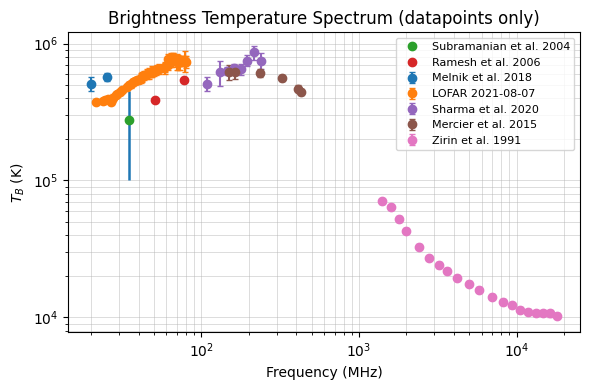

In [ ]:
#!/usr/bin/env python3
# the plot block
"""
Read TbSpectra.csv and plot Tb vs Frequency (datapoints only; no model).
- Uses error bars when Tb_err_K is present.
- For Subramanian range stored as two rows (low/high at same freq), draws a vertical line.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV = "TbSpectra.csv"
OUT_PNG = "TbSpectra.png"

df = pd.read_csv(CSV)

plt.figure(figsize=(6, 4))

# Plot each source separately for a clean legend
for src, g in df.groupby("source", sort=False):
    g = g.copy()

    # Special handling: ranges stored as two rows (same freq) -> draw vlines
    # (works for any source that has duplicated freq and no errorbars)
    dup_freqs = g["freq_MHz"].duplicated(keep=False)
    g_dup = g[dup_freqs].copy()
    g_nondup = g[~dup_freqs].copy()

    # If duplicate-freq rows exist, treat them as a range (low/high)
    if not g_dup.empty:
        for f, gg in g_dup.groupby("freq_MHz"):
            vals = gg["Tb_K"].dropna().to_numpy()
            if len(vals) >= 2:
                y0, y1 = np.min(vals), np.max(vals)
                plt.vlines(f, y0, y1, linewidth=1.8)
                plt.plot([f], [(y0 + y1) / 2], marker="o", linestyle="none", label=src)
            else:
                # fallback
                plt.plot(gg["freq_MHz"], gg["Tb_K"], marker="o", linestyle="none", label=src)

        # Avoid double legend entry if we also plot non-dup points below
        already_labeled = True
    else:
        already_labeled = False

    # Normal points with optional error bars
    if not g_nondup.empty:
        x = g_nondup["freq_MHz"].to_numpy()
        y = g_nondup["Tb_K"].to_numpy()
        yerr = g_nondup["Tb_err_K"].to_numpy()

        has_err = np.isfinite(yerr).any()
        if has_err:
            plt.errorbar(
                x, y, yerr=np.where(np.isfinite(yerr), yerr, 0.0),
                fmt="o", linestyle="none", capsize=2.5,
                label=(None if already_labeled else src),
            )
        else:
            plt.plot(
                x, y, marker="o", linestyle="none",
                label=(None if already_labeled else src),
            )

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (MHz)")
plt.ylabel(r"$T_B$ (K)")
plt.title("Brightness Temperature Spectrum (datapoints only)")
plt.grid(True, which="both", linewidth=0.5, alpha=0.6)
plt.legend(fontsize=8, loc="best")
plt.tight_layout()

